In [1]:
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from filtering import Filtering

In [3]:
sim1 = Filtering.from_ini('LB_FG0.ini')

DATABASE: loaded
SIMUALATION object with out FG: Loaded
FILTERING object with out FG: Loaded


In [ ]:
sim1.run_job()

Cinv filtering:   2%|▏         | 9/500 [54:55<50:01:23, 366.77s/sim]

In [7]:
fgres = sim1.fg_res(0)

Getting Foreground: 100%|██████████| 15/15 [03:07<00:00, 12.48s/freq]


In [9]:
cmb1,noise1,weight1 = sim1.get_cmb_alms(0,binwidth=5)

5


Making maps: 15Freq [04:57, 19.81s/Freq]
Making alms: 100%|██████████| 15/15 [03:26<00:00, 13.74s/Freq]


In [10]:
fgres1 = sim1.fg_res(0)

Getting Foreground: 100%|██████████| 15/15 [03:13<00:00, 12.87s/freq]


In [15]:
cmb2,noise2,weight2 = sim1.get_cmb_alms(0,binwidth=3)

3


Making maps: 15Freq [04:55, 19.68s/Freq]
Making alms: 100%|██████████| 15/15 [03:19<00:00, 13.29s/Freq]


In [16]:
fgres2 = sim1.fg_res(0)

Getting Foreground: 100%|██████████| 15/15 [03:11<00:00, 12.78s/freq]


In [50]:
cmb2,noise2,weight2 = sim1.get_cmb_alms(0,binwidth=15)

15


Making maps: 15Freq [04:56, 19.79s/Freq]
Making alms: 100%|██████████| 15/15 [03:27<00:00, 13.81s/Freq]


In [51]:
fgres2 = sim1.fg_res(0)

Getting Foreground: 100%|██████████| 15/15 [03:12<00:00, 12.82s/freq]


In [12]:
import healpy as hp
import matplotlib.pyplot as plt

[]

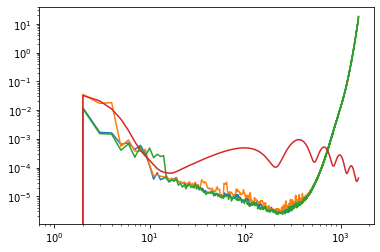

In [52]:
plt.loglog(hp.alm2cl(noise[0][1])+hp.alm2cl(fgres[0][1]))
plt.loglog(hp.alm2cl(noise1[0][1])+hp.alm2cl(fgres1[0][1]))
plt.loglog(hp.alm2cl(noise2[0][1])+hp.alm2cl(fgres2[0][1]))
plt.loglog(sim1.cl_len[1]*sim1.Tcmb**2)
plt.loglog()

In [18]:
noise.shape

(1, 3, 1180416)

In [26]:
fgres1.shape

(1, 3, 1180416)

In [36]:
import numpy as np
from scipy import signal,interpolate

cmb_spectra = np.random.normal(size=1000).cumsum()
jumps = np.random.randint(0, len(cmb_spectra), size=20)
cmb_spectra[jumps] += np.random.normal(scale=5., size=len(jumps))

def interpolate_data(data, factor=10):
    x = np.linspace(0, len(data), len(data), endpoint=True)
    f = interpolate.interp1d(x, data)
    xnew = np.linspace(0, len(data), len(data) * factor, endpoint=True)
    return f(xnew)

def smooth_data(data, window_length=51, polyorder=3):
    return signal.savgol_filter(data, window_length, polyorder)


smoothed_cmb_spectra = smooth_data(cmb_spectra)


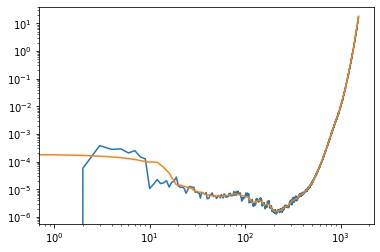

In [47]:
plt.loglog(hp.alm2cl(noise[0][1]))
plt.loglog(smooth_data(hp.alm2cl(noise[0][1]),20,1))